# Predicting the change in FTSE 100 price

## Importing data from Yahoo finance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
data = yf.download('^FTSE', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,6460.500000,6662.700195,6460.500000,6571.899902,6571.899902,965097800
2021-01-05,6571.899902,6622.799805,6544.299805,6612.299805,6612.299805,718950800
2021-01-06,6612.299805,6859.100098,6611.899902,6841.899902,6841.899902,1249709500
2021-01-07,6841.899902,6903.600098,6795.100098,6857.000000,6857.000000,939652600
2021-01-08,6857.000000,6886.299805,6836.100098,6873.299805,6873.299805,850778500


## importing basic mdulues

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

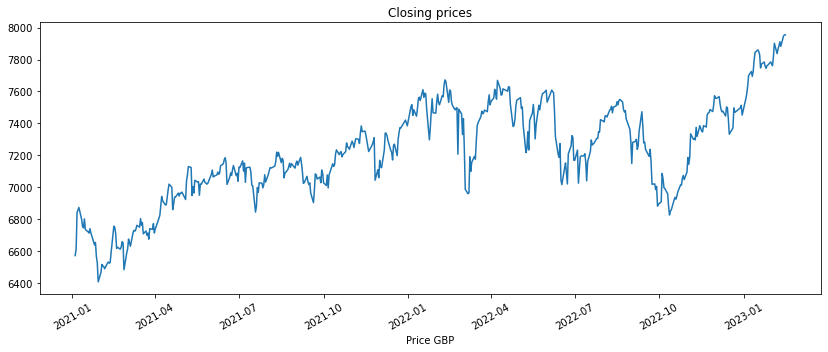

In [6]:
plt.figure(figsize=(14,5))
plt.plot(data["Close"])
plt.xticks(rotation=30)
plt.title("Closing prices")
plt.xlabel("Year-month")
plt.xlabel("Price GBP")
plt.show()

### changing the column names

In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [9]:
data.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

## creating the target variable
### creating a future returns column of percentage change and a signal column

In [10]:
data['future_returns'] = data['close'].pct_change().shift(-1)

# Create the signal column
data['signal'] = np.where(data['future_returns'] > 0, 1, 0)

data.head(10)

,open,high,low,close,adj_close,volume,future_returns,signal
Date,,,,,,,,
2021-01-04,6460.500000,6662.700195,6460.500000,6571.899902,6571.899902,965097800,0.006147,1
2021-01-05,6571.899902,6622.799805,6544.299805,6612.299805,6612.299805,718950800,0.034723,1
2021-01-06,6612.299805,6859.100098,6611.899902,6841.899902,6841.899902,1249709500,0.002207,1
2021-01-07,6841.899902,6903.600098,6795.100098,6857.000000,6857.000000,939652600,0.002377,1
2021-01-08,6857.000000,6886.299805,6836.100098,6873.299805,6873.299805,850778500,-0.010883,0
2021-01-11,6873.299805,6873.299805,6768.700195,6798.500000,6798.500000,707799500,-0.006531,0
2021-01-12,6798.500000,6816.700195,6738.200195,6754.100098,6754.100098,648158800,-0.001273,0
2021-01-13,6754.100098,6772.600098,6736.000000,6745.500000,6745.500000,619448200,0.008376,1
2021-01-14,6745.500000,6802.000000,6736.799805,6802.000000,6802.000000,685978100,-0.009747,0


In [11]:
data.tail()

,open,high,low,close,adj_close,volume,future_returns,signal
Date,,,,,,,,
2023-02-09,7885.200195,7949.600098,7874.200195,7911.200195,7911.200195,1061015400,-0.003628,0
2023-02-10,7911.200195,7913.299805,7850.899902,7882.500000,7882.500000,974265500,0.008259,1
2023-02-13,7882.500000,7947.600098,7881.899902,7947.600098,7947.600098,570125100,0.000793,1
2023-02-14,7947.600098,7996.399902,7947.600098,7953.899902,7953.899902,697856100,0.000138,1
2023-02-15,7953.850098,7958.020020,7921.319824,7955.000000,7955.000000,0,NaN,0


In [12]:
#removing last row as no target so would mess up model
data = data.drop("2023-02-14", axis=0)

In [13]:
data.tail()

,open,high,low,close,adj_close,volume,future_returns,signal
Date,,,,,,,,
2023-02-08,7864.700195,7934.299805,7864.700195,7885.200195,7885.200195,587150400,0.003297,1
2023-02-09,7885.200195,7949.600098,7874.200195,7911.200195,7911.200195,1061015400,-0.003628,0
2023-02-10,7911.200195,7913.299805,7850.899902,7882.500000,7882.500000,974265500,0.008259,1
2023-02-13,7882.500000,7947.600098,7881.899902,7947.600098,7947.600098,570125100,0.000793,1
2023-02-15,7953.850098,7958.020020,7921.319824,7955.000000,7955.000000,0,NaN,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 534 entries, 2021-01-04 to 2023-02-15
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            534 non-null    float64
 1   high            534 non-null    float64
 2   low             534 non-null    float64
 3   close           534 non-null    float64
 4   adj_close       534 non-null    float64
 5   volume          534 non-null    int64  
 6   future_returns  533 non-null    float64
 7   signal          534 non-null    int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 35.5 KB


## creating features
creating a few days before percentage change

In [15]:
# last day percent change
data['pct_change1'] = data['close'].pct_change()
# last 3 days percent change
data['pct_change3'] = data['close'].pct_change(3)
# last 5 days percent change
data['pct_change5'] = data['close'].pct_change(5)
# last 10 days percent change
data['pct_change10'] = data['close'].pct_change(10)

## using technical indicators RSI and ADX
### using talib library

In [16]:
pip install ta-lib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import talib as ta

In [18]:
data['rsi'] = ta.RSI(data['close'].values, timeperiod=4)
data['adx'] = ta.ADX(data['high'].values, data['low'].values,
                     data['open'].values, timeperiod=4)

## rolling average mean and correlation

In [19]:
# rolling average and correlation for last for last 3 days

data['sma3'] = data['close'].rolling(window=3).mean()
data['corr3'] = data['close'].rolling(window=3).corr(data['sma3'])

# rolling average and correlation for last for last 5 days

data['sma5'] = data['close'].rolling(window=3).mean()
data['corr5'] = data['close'].rolling(window=3).corr(data['sma5'])
                                                     
# rolling average and correlation for last for last 10 days

data['sma10'] = data['close'].rolling(window=3).mean()
data['corr10'] = data['close'].rolling(window=3).corr(data['sma10'])                                                     

## volatility

In [20]:
# 3 day volatility 

data['volatility3'] = data.rolling(
    3, min_periods=3)['pct_change1'].std()*100

# 5 day volatility
data['volatility5'] = data.rolling(
    5, min_periods=5)['pct_change1'].std()*100

# 10 day volatility
data['volatility10'] = data.rolling(
    10, min_periods=10)['pct_change1'].std()*100

In [21]:
data.tail()

,open,high,low,close,adj_close,volume,future_returns,signal,pct_change1,pct_change3,...,adx,sma3,corr3,sma5,corr5,sma10,corr10,volatility3,volatility5,volatility10
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-08,7864.700195,7934.299805,7864.700195,7885.200195,7885.200195,587150400,0.003297,1,0.002607,-0.002101,...,60.383554,7862.200195,0.687633,7862.200195,0.687633,7862.200195,0.687633,0.655824,0.712673,0.513602
2023-02-09,7885.200195,7949.600098,7874.200195,7911.200195,7911.200195,1061015400,-0.003628,0,0.003297,0.009507,...,66.127449,7887.033529,0.784287,7887.033529,0.784287,7887.033529,0.784287,0.049781,0.670698,0.515750
2023-02-10,7911.200195,7913.299805,7850.899902,7882.500000,7882.500000,974265500,0.008259,1,-0.003628,0.002263,...,58.762981,7892.966797,0.252763,7892.966797,0.252763,7892.966797,0.252763,0.381448,0.525180,0.544253
2023-02-13,7882.500000,7947.600098,7881.899902,7947.600098,7947.600098,570125100,0.000793,1,0.008259,0.007914,...,58.515727,7913.766764,0.784850,7913.766764,0.784850,7913.766764,0.784850,0.597027,0.424249,0.584775
2023-02-15,7953.850098,7958.020020,7921.319824,7955.000000,7955.000000,0,NaN,0,0.000931,0.005536,...,59.585733,7928.366699,0.946061,7928.366699,0.946061,7928.366699,0.946061,0.599681,0.428977,0.571654


drop and rows with na in

In [22]:
data.dropna(inplace=True)

In [23]:
data.head()

,open,high,low,close,adj_close,volume,future_returns,signal,pct_change1,pct_change3,...,adx,sma3,corr3,sma5,corr5,sma10,corr10,volatility3,volatility5,volatility10
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-18,6735.700195,6741.500000,6709.299805,6720.700195,6720.700195,359826900,-0.001146,0,-0.002227,-0.003676,...,29.507448,6752.800130,0.907002,6752.800130,0.907002,6752.800130,0.907002,0.910512,0.686281,1.305184
2021-01-19,6720.700195,6770.700195,6697.700195,6713.000000,6713.000000,618144700,0.004082,1,-0.001146,-0.013084,...,25.353681,6723.133464,0.878326,6723.133464,0.878326,6723.133464,0.878326,0.468518,0.643845,1.301774
2021-01-20,6713.000000,6751.799805,6697.500000,6740.399902,6740.399902,687499600,-0.003709,0,0.004082,0.000698,...,22.177491,6724.700033,-0.199372,6724.700033,-0.199372,6724.700033,-0.199372,0.337373,0.685577,0.614203
2021-01-21,6740.399902,6776.899902,6715.399902,6715.399902,6715.399902,621554400,-0.003023,0,-0.003709,-0.000789,...,25.582015,6722.933268,0.983336,6722.933268,0.983336,6722.933268,0.983336,0.397049,0.497986,0.603174
2021-01-22,6715.399902,6715.700195,6651.700195,6695.100098,6695.100098,693954900,-0.008394,0,-0.003023,-0.002666,...,26.287072,6716.966634,0.934597,6716.966634,0.934597,6716.966634,0.934597,0.431350,0.310527,0.582783


In [24]:
len(data)

523

## Creating X and y

In [25]:
y = data[["signal"]].copy()

In [26]:
data.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'future_returns',
       'signal', 'pct_change1', 'pct_change3', 'pct_change5', 'pct_change10',
       'rsi', 'adx', 'sma3', 'corr3', 'sma5', 'corr5', 'sma10', 'corr10',
       'volatility3', 'volatility5', 'volatility10'],
      dtype='object')

In [27]:
X = data[['pct_change1', 'pct_change3', 'pct_change5', 'pct_change10',
       'rsi', 'adx', 'sma3', 'corr3', 'sma5', 'corr5', 'sma10', 'corr10',
       'volatility3', 'volatility5', 'volatility10']].copy()

### Checking that features are stationary
#### using adfuller from statsmodels, and dropping non-stationary


In [28]:
from statsmodels.tsa.stattools import adfuller

just checking first

In [29]:
def stationary(series):
    result = adfuller(series)
    if(result[1] < 0.05):
        return 'stationary'
    else:
        return 'not stationary'

for col in X.columns:
    if stationary(data[col]) == 'not stationary':
        print('%s is not stationary, so I should drop it.' % col)
    else:
        print('%s is stationary.' % col)

pct_change1 is stationary.
pct_change3 is stationary.
pct_change5 is stationary.
pct_change10 is stationary.
rsi is stationary.
adx is stationary.
sma3 is not stationary, so I should drop it.
corr3 is stationary.
sma5 is not stationary, so I should drop it.
corr5 is stationary.
sma10 is not stationary, so I should drop it.
corr10 is stationary.
volatility3 is stationary.
volatility5 is stationary.
volatility10 is stationary.


In [30]:
X.drop("sma3", axis=1, inplace=True)
X.drop("sma5", axis=1, inplace=True)
X.drop("sma10", axis=1, inplace=True)

In [31]:
X.head()

,pct_change1,pct_change3,pct_change5,pct_change10,rsi,adx,corr3,corr5,corr10,volatility3,volatility5,volatility10
Date,,,,,,,,,,,,
2021-01-18,-0.002227,-0.003676,-0.011444,0.022642,46.031859,29.507448,0.907002,0.907002,0.907002,0.910512,0.686281,1.305184
2021-01-19,-0.001146,-0.013084,-0.006085,0.015229,43.618668,25.353681,0.878326,0.878326,0.878326,0.468518,0.643845,1.301774
2021-01-20,0.004082,0.000698,-0.000756,-0.014835,54.848875,22.177491,-0.199372,-0.199372,-0.199372,0.337373,0.685577,0.614203
2021-01-21,-0.003709,-0.000789,-0.012732,-0.020650,44.150501,25.582015,0.983336,0.983336,0.983336,0.397049,0.497986,0.603174
2021-01-22,-0.003023,-0.002666,-0.006028,-0.025926,36.452646,26.287072,0.934597,0.934597,0.934597,0.431350,0.310527,0.582783


## checking for correlation between the feature

In [32]:
def get_correlated(X, limit):
    # Calculate the correlation matrix
    correl = X.corr()

    # Unstack the matrix
    correl = correl.abs().unstack()

    # Recurring & redundant pair
    pairs_to_drop = set()
    cols = X.corr().columns
    for i in range(0, X.corr().shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))

    # Drop the recurring & redundant pair
    correl = correl.drop(labels=pairs_to_drop).sort_values(ascending=False)

    return correl[correl > limit].index


print(get_correlated(X, 0.6))

MultiIndex([(       'corr5',       'corr10'),
            (       'corr3',       'corr10'),
            (       'corr3',        'corr5'),
            ( 'pct_change5',          'rsi'),
            ( 'volatility5', 'volatility10'),
            ( 'volatility3',  'volatility5'),
            ( 'pct_change3',          'rsi'),
            ('pct_change10',          'rsi'),
            ( 'pct_change3',  'pct_change5'),
            ( 'pct_change5', 'pct_change10'),
            ( 'volatility3', 'volatility10')],
           )


In [33]:
print("higher than 70% correlated:")
print(get_correlated(X, 0.7))
print("higher than 80% correlated:")
print(get_correlated(X, 0.8))
print("higher than 90% correlated:")
print(get_correlated(X, 0.9))

higher than 70% correlated:
MultiIndex([(       'corr5',       'corr10'),
            (       'corr3',       'corr10'),
            (       'corr3',        'corr5'),
            ( 'pct_change5',          'rsi'),
            ( 'volatility5', 'volatility10'),
            ( 'volatility3',  'volatility5'),
            ( 'pct_change3',          'rsi'),
            ('pct_change10',          'rsi'),
            ( 'pct_change3',  'pct_change5')],
           )
higher than 80% correlated:
MultiIndex([(      'corr5',       'corr10'),
            (      'corr3',       'corr10'),
            (      'corr3',        'corr5'),
            ('pct_change5',          'rsi'),
            ('volatility5', 'volatility10')],
           )
higher than 90% correlated:
MultiIndex([('corr5', 'corr10'),
            ('corr3', 'corr10'),
            ('corr3',  'corr5')],
           )


all the correlations are highly correlated, so I'll drop corr 5 and corr10.
the higher volatilities are quite highly correlated as well, so i'll drop volatility5

In [34]:
X = X.drop(["corr5", "corr10", "volatility5"], axis=1)

In [35]:
X.columns

Index(['pct_change1', 'pct_change3', 'pct_change5', 'pct_change10', 'rsi',
       'adx', 'corr3', 'volatility3', 'volatility10'],
      dtype='object')

# Splitting the data into training and testing

I will split it 70% train, 15% valid and 15% test
import from sklearn

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.70, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, train_size=0.50, shuffle=False)

In [38]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

366
78
79


#### visualising the test data

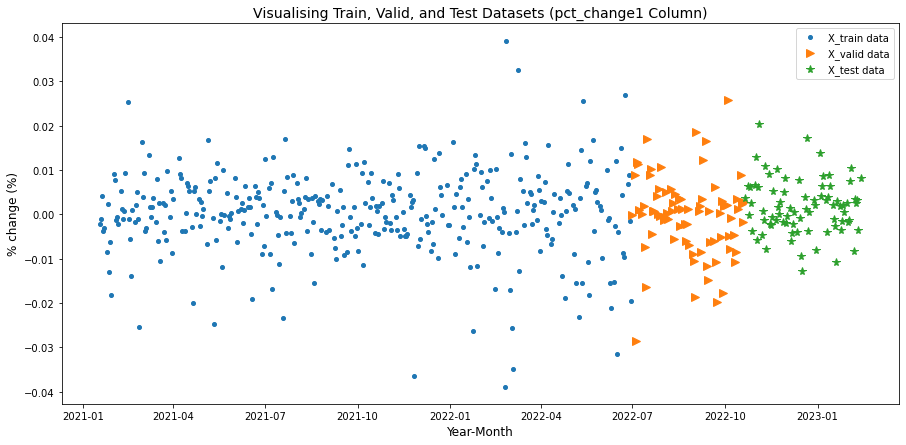

In [39]:
plt.figure(figsize=(15, 7))

plt.plot(X_train['pct_change1'], linestyle='None',
          marker=".", markersize=8.0, label='X_train data')
plt.plot(X_valid['pct_change1'], linestyle='None',
         marker='>', markersize=8.0, label='X_valid data')
plt.plot(X_test['pct_change1'], linestyle='None',
         marker='*', markersize=8.0, label='X_test data')

plt.title("Visualising Train, Valid, and Test Datasets (pct_change1 Column)", fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

# Random Forrest Classification

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(n_estimators=3, max_features=3, max_depth=2, random_state=4)

In [44]:
rf_model.fit(X_train, y_train["signal"])

RandomForestClassifier(max_depth=2, max_features=3, n_estimators=3,
                       random_state=4)

In [48]:
y_pred_rf = rf_model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.46      0.41      0.43        32
           1       0.63      0.68      0.65        47

    accuracy                           0.57        79
   macro avg       0.55      0.54      0.54        79
weighted avg       0.56      0.57      0.56        79



## Accuracy for Random Forest Model = 0.57

# K Nearest Neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train["signal"])

KNeighborsClassifier()

In [53]:
y_pred_knn = knn_model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.69      0.53        32
           1       0.64      0.38      0.48        47

    accuracy                           0.51        79
   macro avg       0.54      0.54      0.51        79
weighted avg       0.56      0.51      0.50        79



## Accuracy for K nearest neighbours = 0.51

# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train["signal"])

In [57]:
y_pred_nb = nb_model.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.43      0.78      0.56        32
           1       0.67      0.30      0.41        47

    accuracy                           0.49        79
   macro avg       0.55      0.54      0.48        79
weighted avg       0.57      0.49      0.47        79



## Naive Bayes Accuracy = 0.49

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train["signal"])

C:\Users\megan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
y_pred_lg = lg_model.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.43      0.72      0.53        32
           1       0.64      0.34      0.44        47

    accuracy                           0.49        79
   macro avg       0.53      0.53      0.49        79
weighted avg       0.55      0.49      0.48        79



## Logistic regression accuracy = 0.49

# Support Vector Machines

In [61]:
from sklearn.svm import SVC

In [62]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train["signal"])

In [65]:
y_pred_svm = svm_model.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.44      0.62      0.52        32
           1       0.65      0.47      0.54        47

    accuracy                           0.53        79
   macro avg       0.55      0.55      0.53        79
weighted avg       0.56      0.53      0.53        79



## Support vector machines accuracy = 0.53

# Artificial Neural Networks

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
ann_model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
                    solver='lbfgs')
ann_model = ann_model.fit(X_train, y_train["signal"])

In [71]:
y_pred_ann = svm_model.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.44      0.62      0.52        32
           1       0.65      0.47      0.54        47

    accuracy                           0.53        79
   macro avg       0.55      0.55      0.53        79
weighted avg       0.56      0.53      0.53        79



## Artificial neural networks acurracy = 0.53 

# Random Forrest #2

In [73]:
rf2_model = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf2_model = rf2_model.fit(X_train, y_train["signal"])

In [74]:
y_pred_rf2 = rf2_model.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.48      0.75      0.59        32
           1       0.72      0.45      0.55        47

    accuracy                           0.57        79
   macro avg       0.60      0.60      0.57        79
weighted avg       0.63      0.57      0.57        79



## second randon forest accuracy = 0.57

# Ridge

In [77]:
from sklearn.linear_model import Ridge

rr_model = Ridge(alpha=.1)
rr_model = rr_model.fit(X_train, y_train["signal"])

In [78]:
y_pred_rr = rr_model.predict(X_test)

In [83]:
y_pred_rr = [round(num) for num in y_pred_rr]

In [85]:
print(classification_report(y_test, y_pred_rr))

              precision    recall  f1-score   support

           0       0.43      0.72      0.53        32
           1       0.64      0.34      0.44        47

    accuracy                           0.49        79
   macro avg       0.53      0.53      0.49        79
weighted avg       0.55      0.49      0.48        79



## Ridge accuracy = 0.49

# Neural Network

In [86]:
import tensorflow as tf

In [87]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [89]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [91]:
nn_model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 1.3634 - accuracy: 0.4672


[1.3633768558502197, 0.46721312403678894]

In [93]:
nn_model.evaluate(X_valid, y_valid)

3/3 [==============================] - 0s 2ms/step - loss: 1.3823 - accuracy: 0.4359


[1.382324457168579, 0.43589743971824646]

In [94]:
nn_model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.8801 - accuracy: 0.4809 - val_loss: 0.7219 - val_accuracy: 0.5128
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.7287 - accuracy: 0.4454 - val_loss: 0.6999 - val_accuracy: 0.4615
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4863 - val_loss: 0.6922 - val_accuracy: 0.5128
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5027 - val_loss: 0.6919 - val_accuracy: 0.5769
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5410 - val_loss: 0.6925 - val_accuracy: 0.5769
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5055 - val_loss: 0.6887 - val_accuracy: 0.5897
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5109 - val_loss: 0.6933 - val_accuracy: 0.6026
Epoch 8/20
23/23 [==

In [95]:
nn_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.4810


[0.711376428604126, 0.4810126721858978]

In [97]:
y_pred_nn = nn_model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [104]:
y_pred_nn = y_pred_nn.tolist()

In [107]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [108]:
y_pred_nn = flatten(y_pred_nn)

In [109]:
y_pred_nn

[0.5485239028930664,
 0.5479598045349121,
 0.5796365141868591,
 0.6081628799438477,
 0.5191239714622498,
 0.5105844140052795,
 0.4926692545413971,
 0.39516153931617737,
 0.4138481616973877,
 0.3963989019393921,
 0.31709587574005127,
 0.36976903676986694,
 0.43694570660591125,
 0.3895595371723175,
 0.32722780108451843,
 0.4213736355304718,
 0.3984881341457367,
 0.40102458000183105,
 0.5093178749084473,
 0.47433188557624817,
 0.44368910789489746,
 0.4140837490558624,
 0.34559816122055054,
 0.36894381046295166,
 0.37749582529067993,
 0.40114936232566833,
 0.38735195994377136,
 0.40097329020500183,
 0.37668654322624207,
 0.38833650946617126,
 0.5106377601623535,
 0.5105565786361694,
 0.4126345217227936,
 0.4508063793182373,
 0.45790258049964905,
 0.45925772190093994,
 0.5791492462158203,
 0.4153510630130768,
 0.41511544585227966,
 0.47300851345062256,
 0.595805823802948,
 0.47395893931388855,
 0.598105251789093,
 0.3654952645301819,
 0.37993502616882324,
 0.4657262861728668,
 0.39141723513

In [110]:
y_pred_nn = [round(num) for num in y_pred_nn]

In [111]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.42      0.78      0.55        32
           1       0.65      0.28      0.39        47

    accuracy                           0.48        79
   macro avg       0.54      0.53      0.47        79
weighted avg       0.56      0.48      0.45        79



## Neural net accuracy = 0.48

# Neural Net 2

In [120]:
nn2_model = tf.keras.Sequential()
nn2_model.add(tf.keras.layers.Dense(16, activation='relu'))
nn2_model.add(tf.keras.layers.Dropout(0.4))
nn2_model.add(tf.keras.layers.Dense(16, activation='relu'))
nn2_model.add(tf.keras.layers.Dropout(0.4))
nn2_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [121]:
nn2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [122]:
nn2_model.evaluate(X_train, y_train["signal"])

12/12 [==============================] - 0s 2ms/step - loss: 2.3808 - accuracy: 0.4727


[2.380753755569458, 0.4726775884628296]

In [123]:
nn2_model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 1ms/step - loss: 2.3808 - accuracy: 0.4727


[2.380753755569458, 0.4726775884628296]

In [124]:
nn2_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
12/12 [==============================] - 1s 7ms/step - loss: 3.8557 - accuracy: 0.5027 - val_loss: 2.1963 - val_accuracy: 0.4359
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 2.9374 - accuracy: 0.5082 - val_loss: 1.4740 - val_accuracy: 0.4615
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 2.3447 - accuracy: 0.5164 - val_loss: 1.0428 - val_accuracy: 0.4744
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 1.9233 - accuracy: 0.5628 - val_loss: 0.8199 - val_accuracy: 0.4615
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 1.7680 - accuracy: 0.4727 - val_loss: 0.7388 - val_accuracy: 0.5000
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 1.6771 - accuracy: 0.5000 - val_loss: 0.7067 - val_accuracy: 0.5128
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 1.7103 - accuracy: 0.4590 - val_loss: 0.6894 - val_accuracy: 0.5513
Epoch 8/10
12/12 [==

In [125]:
y_pred_nn2 = nn2_model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [128]:
y_pred_nn2 = y_pred_nn2.tolist()
def flatten(l):
    return [item for sublist in l for item in sublist]
y_pred_nn2 = flatten(y_pred_nn2)
y_pred_nn2 = [round(num) for num in y_pred_nn2]

In [129]:
print(classification_report(y_test, y_pred_nn2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.59      1.00      0.75        47

    accuracy                           0.59        79
   macro avg       0.30      0.50      0.37        79
weighted avg       0.35      0.59      0.44        79



C:\Users\megan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\megan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\megan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural net 2 accuracy = 0.59

#### creating a dataframe from the most acurate, neural net 2, random forest 1 and 2, knn, support, artificial nn

In [134]:
correlation = pd.DataFrame(list(zip(y_pred_rf, y_pred_rf2)), columns=["rf1", "rf2"])

In [137]:
correlation.corr()

,rf1,rf2
rf1,1.000000,0.399595
rf2,0.399595,1.000000


In [139]:
df = pd.DataFrame(list(zip(y_pred_nn2, y_pred_rf, y_pred_rf2, y_pred_knn, y_pred_svm, y_pred_ann)), columns=["nn2", "rf1", "rf2", "knn", "svm", "ann"])

In [141]:
df.index = y_test.index

In [142]:
df.head()

,nn2,rf1,rf2,knn,svm,ann
Date,,,,,,
2022-10-21,1,1,0,1,1,1
2022-10-24,1,0,0,1,1,1
2022-10-25,1,0,1,1,1,1
2022-10-26,1,0,0,0,0,0
2022-10-27,1,0,0,1,0,0


In [147]:
df["mean"] = df.mean(axis=1)

In [151]:
df["taget"] = round(df["mean"]).astype(int)

In [152]:
df.head()

,nn2,rf1,rf2,knn,svm,ann,mean,taget
Date,,,,,,,,
2022-10-21,1,1,0,1,1,1,0.833333,1
2022-10-24,1,0,0,1,1,1,0.666667,1
2022-10-25,1,0,1,1,1,1,0.833333,1
2022-10-26,1,0,0,0,0,0,0.166667,0
2022-10-27,1,0,0,1,0,0,0.333333,0


In [153]:
print(classification_report(y_test, df["taget"]))

              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.64      0.49      0.55        47

    accuracy                           0.53        79
   macro avg       0.54      0.54      0.53        79
weighted avg       0.56      0.53      0.53        79

